# Selecting _unassociated_ pairs

In [134]:
from pathlib import Path

import pandas as pd
from tabulate import tabulate as tab
from source.utils import RESULT_DIR, print_iter
from source.utils.sample import sample_pickle as sampkl
from source.utils.dataframes import enhance_descrip, print_md_table

EX_ADV_ADJ = RESULT_DIR.joinpath('assoc_df/adv_adj/RBXadj/extra')
# print(tab.__doc__)

## Available Pickled Association DataFrames

In [52]:
!(tree -Dhr --sort='mtime' $EX_ADV_ADJ | egrep 'pkl\.gz')

├── [3.6M Apr 27 00:28]  all_adj-x-adv_frq-thr0-001p.35f=868+_min300x_extra.pkl.gz
├── [ 12M Apr 27 00:27]  all_adj-x-adv_frq-thr0-001p.35f=868+_min50x_extra.pkl.gz
├── [1.1M Apr 26 23:44]  all_adj-x-adv_frq-thr0-001p.35f=868+_min1500x_extra.pkl.gz
├── [356K Apr 26 23:43]  all_adj-x-adv_frq-thr0-001p.35f=868+_min5500x_extra.pkl.gz
├── [674K Apr 26 23:24]  all_adj-x-adv_frq-thr0-001p.35f=868+_min2500x_extra.pkl.gz
├── [270K Apr 26 23:24]  all_adj-x-adv_frq-thr0-001p.35f=868+_min7000x_extra.pkl.gz
├── [1.4M Apr 26 23:12]  all_adj-x-adv_frq-thr0-001p.35f=868+_min1000x_extra.pkl.gz
├── [391K Apr 26 23:11]  all_adj-x-adv_frq-thr0-001p.35f=868+_min4500x_extra.pkl.gz
├── [1.6M Apr 26 22:40]  all_adj-x-adv_frq-thr0-001p.35f=868+_min800x_extra.pkl.gz
├── [430K Apr 26 22:39]  all_adj-x-adv_frq-thr0-001p.35f=868+_min4000x_extra.pkl.gz
├── [634K Apr 26 22:21]  all_adj-x-adv_frq-thr0-001p.35f=868+_min3000x_extra.pkl.gz
├── [341K Apr 26 22:20]  all_adj-x-adv_frq-thr0-001p.35f=868+_min6000x_extra.pkl

In [144]:
!(tree -Dh --sort='Size' $EX_ADV_ADJ | egrep 'pkl\.gz')

├── [ 12M Apr 27 00:27]  all_adj-x-adv_frq-thr0-001p.35f=868+_min50x_extra.pkl.gz
├── [3.6M Apr 27 00:28]  all_adj-x-adv_frq-thr0-001p.35f=868+_min300x_extra.pkl.gz
├── [1.6M Apr 26 22:40]  all_adj-x-adv_frq-thr0-001p.35f=868+_min800x_extra.pkl.gz
├── [1.4M Apr 26 23:12]  all_adj-x-adv_frq-thr0-001p.35f=868+_min1000x_extra.pkl.gz
├── [1.1M Apr 26 23:44]  all_adj-x-adv_frq-thr0-001p.35f=868+_min1500x_extra.pkl.gz
├── [934K Apr 26 22:03]  all_adj-x-adv_frq-thr0-001p.35f=868+_min2000x_extra.pkl.gz
├── [674K Apr 26 23:24]  all_adj-x-adv_frq-thr0-001p.35f=868+_min2500x_extra.pkl.gz
├── [634K Apr 26 22:21]  all_adj-x-adv_frq-thr0-001p.35f=868+_min3000x_extra.pkl.gz
├── [430K Apr 26 22:39]  all_adj-x-adv_frq-thr0-001p.35f=868+_min4000x_extra.pkl.gz
├── [417K Apr 26 22:02]  all_adj-x-adv_frq-thr0-001p.35f=868+_min5000x_extra.pkl.gz
├── [391K Apr 26 23:11]  all_adj-x-adv_frq-thr0-001p.35f=868+_min4500x_extra.pkl.gz
├── [356K Apr 26 23:43]  all_adj-x-adv_frq-thr0-001p.35f=868+_min5500x_extra.pkl

In [53]:
def _get_path(lsflags='Sr', 
             directory:Path=EX_ADV_ADJ, 
             n_paths:int=1) -> Path or list: 
    paths = !(ls -$lsflags $directory/*pkl.gz)
    paths = [Path(p) for p in paths[:n_paths]]
    return paths[0] if n_paths == 1 else paths

In [146]:
recent_am_path = _get_path(lsflags='t')
small_am_path = _get_path()
moderate_am_path = _get_path(n_paths=9)[-1]
print(tab([['most recent', recent_am_path.relative_to(RESULT_DIR)], 
           ['smallest', small_am_path.relative_to(RESULT_DIR)], 
           ['middling', moderate_am_path.relative_to(RESULT_DIR)]], tablefmt='rounded_grid'))


╭─────────────┬──────────────────────────────────────────────────────────────────────────────────────────╮
│ most recent │ assoc_df/adv_adj/RBXadj/extra/all_adj-x-adv_frq-thr0-001p.35f=868+_min300x_extra.pkl.gz  │
├─────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│ smallest    │ assoc_df/adv_adj/RBXadj/extra/all_adj-x-adv_frq-thr0-001p.35f=868+_min7000x_extra.pkl.gz │
├─────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│ middling    │ assoc_df/adv_adj/RBXadj/extra/all_adj-x-adv_frq-thr0-001p.35f=868+_min2000x_extra.pkl.gz │
╰─────────────┴──────────────────────────────────────────────────────────────────────────────────────────╯


In [55]:
pd.set_option("display.float_format", '{:,.4f}'.format)


In [147]:
amdf = pd.read_pickle(moderate_am_path)
amdf

,l1,l2,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,...,deltaP_min,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,,,
most~wanted,most,wanted,3371,310.4432,"15,699.7005",1.0358,2.8702,0.0004,0.0004,0.0210,...,0.0004,0.8960,0.0004,"3,060.5568",0.9079,17.6194,55.3223,58.0603,"2,751.1474",58.4466
legally~binding,legally,binding,2438,1.2453,"35,625.1352",3.2918,4.2019,0.0653,0.0660,0.2394,...,0.0660,0.8681,0.0573,"2,436.7547",0.9995,1.1159,49.3635,49.3761,192.2212,52.9811
very~own,very,own,95941,"11,637.7956","391,490.3136",0.9161,2.5929,0.0097,0.0097,0.0975,...,0.0097,0.8633,0.0083,"84,303.2044",0.8787,107.8786,290.3501,309.7434,"3,148.5603",312.6835
previously~unreleased,previously,unreleased,4830,4.9655,"63,646.4414",2.9880,3.8602,0.0651,0.0659,0.2375,...,0.0659,0.8557,0.0563,"4,825.0345",0.9990,2.2283,69.4625,69.4982,270.8081,75.0933
partly~cloudy,partly,cloudy,54413,61.3124,"752,182.7320",2.9482,4.2489,0.6103,0.6922,0.7615,...,0.6921,0.8374,0.5795,"54,351.6876",0.9989,7.8302,233.1345,233.2659,280.3730,254.8706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
very~responsible,very,responsible,2662,"24,868.8233","-35,151.1317",-0.9704,-1.0209,0.0003,0.0003,0.0018,...,-0.1066,-0.0025,0.0003,"-22,206.8233",-8.3422,157.6985,149.0195,51.5946,"3,148.5603",457.0853
more~sure,more,sure,2324,"94,465.9749","-178,985.2253",-1.6090,-1.6642,0.0002,0.0002,0.0008,...,-0.1103,-0.0111,0.0012,"-92,141.9749",-39.6480,307.3532,303.5490,48.2079,"3,053.0308",918.7306
more~more,more,more,2280,"115,066.3410","-222,633.0834",-1.7030,-1.7595,0.0002,0.0002,0.0007,...,-0.1111,-0.0136,0.0015,"-112,786.3410",-49.4677,339.2143,335.8368,47.7493,"3,053.0308","1,013.9689"


In [148]:
amdf['deltaP_abs_max'] = amdf.filter(regex=r'given\d$').abs().max(axis=1)
amdf.filter(regex=r'(delta.+max|given\d)$')

,am_p1_given2,am_p2_given1,deltaP_max,deltaP_abs_max
key,,,,
most~wanted,0.8960,0.0004,0.8960,0.8960
legally~binding,0.8681,0.0660,0.8681,0.8681
very~own,0.8633,0.0097,0.8633,0.8633
previously~unreleased,0.8557,0.0659,0.8557,0.8557
partly~cloudy,0.8374,0.6921,0.8374,0.8374
...,...,...,...,...
very~responsible,-0.1066,-0.0025,-0.0025,0.1066
more~sure,-0.1103,-0.0111,-0.0111,0.1103
more~more,-0.1111,-0.0136,-0.0136,0.1111


In [149]:
amdf.columns

Index(['l1', 'l2', 'f', 'E11', 'am_log_likelihood', 'am_MI',
       'am_odds_ratio_disc', 'am_Jaccard', 'am_MS', 'am_gmean',
       'am_relative_risk', 'am_t_score', 'am_z_score_corr', 'am_chi_squared',
       'am_chi_squared_corr', 'am_p1_given2', 'am_p2_given1',
       'am_p1_given2_simple', 'am_p2_given1_simple', 'f1', 'f2', 'N', 'O11',
       'O12', 'O21', 'O22', 'R1', 'R2', 'C1', 'C2', 'E12', 'E21', 'E22',
       'log_likelihood', 't_score', 'mutual_information',
       'conservative_log_ratio_1t', 'conservative_log_ratio',
       'conservative_log_ratio_nc', 'deltaP_min', 'deltaP_max',
       'deltaP_product', 'unexpected_f', 'unexpected_ratio', 'expected_sqrt',
       'unexpected_abs_sqrt', 'f_sqrt', 'f1_sqrt', 'f2_sqrt',
       'deltaP_abs_max'],
      dtype='object')

In [150]:
amdf_num = amdf.select_dtypes(include='number')

In [151]:
amdf.nlargest(12, 'am_log_likelihood')

,l1,l2,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,...,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,,,,,
so~many,so,many,1191864,"152,233.8990","3,693,491.5544",0.8937,1.2946,0.1765,0.2078,0.3347,...,0.4832,0.0940,"1,039,630.1010",0.8723,390.1716,"1,019.6226","1,091.7252","2,394.9873","1,486.7370",0.4832
not~sure,not,sure,467213,"44,752.8773","1,669,603.1622",1.0187,1.3917,0.0975,0.1058,0.2420,...,0.5056,0.0511,"422,460.1227",0.9042,211.5488,649.9693,683.5298,"2,101.3769",918.7306,0.5056
too~much,too,much,583184,"75,900.2267","1,613,903.8107",0.8856,1.1106,0.1227,0.1639,0.2320,...,0.2917,0.0435,"507,283.7733",0.8699,275.5000,712.2386,763.6648,"1,886.1177","1,333.0131",0.2917
much~more,much,more,355655,"24,525.8658","1,424,388.1064",1.1614,1.4173,0.1337,0.1790,0.2488,...,0.3261,0.0557,"331,129.1342",0.9310,156.6074,575.4382,596.3682,"1,409.5134","1,013.9689",0.3261
much~better,much,better,295224,"17,669.7216","1,273,191.0270",1.2229,1.5007,0.1214,0.1486,0.2434,...,0.3781,0.0541,"277,554.2784",0.9401,132.9275,526.8342,543.3452,"1,409.5134",860.6515,0.3781
so~much,so,much,614652,"122,380.4106","1,210,766.6804",0.7009,0.8970,0.0891,0.1072,0.1925,...,0.2831,0.0261,"492,271.5894",0.8009,349.8291,701.6207,783.9974,"2,394.9873","1,333.0131",0.2831
most~recent,most,recent,313185,"36,520.7943","1,106,215.5077",0.9333,1.5660,0.0409,0.0414,0.1796,...,0.6918,0.0278,"276,664.2057",0.8834,191.1041,525.9888,559.6293,"2,751.1474",633.9251,0.6918
most~important,most,important,748533,"199,883.9187","1,091,951.9871",0.5734,0.7495,0.0830,0.0989,0.1835,...,0.2562,0.0204,"548,649.0813",0.7330,447.0838,740.7085,865.1780,"2,751.1474","1,483.0533",0.2562
more~likely,more,likely,498401,"117,330.5491","880,719.7414",0.6282,0.8774,0.0505,0.0535,0.1594,...,0.3681,0.0169,"381,070.4509",0.7646,342.5355,617.3090,705.9752,"3,053.0308","1,023.8965",0.3681


In [152]:
amdf.nlargest(12, 't_score')



,l1,l2,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,...,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,,,,,
so~many,so,many,1191864,"152,233.8990","3,693,491.5544",0.8937,1.2946,0.1765,0.2078,0.3347,...,0.4832,0.0940,"1,039,630.1010",0.8723,390.1716,"1,019.6226","1,091.7252","2,394.9873","1,486.7370",0.4832
too~much,too,much,583184,"75,900.2267","1,613,903.8107",0.8856,1.1106,0.1227,0.1639,0.2320,...,0.2917,0.0435,"507,283.7733",0.8699,275.5000,712.2386,763.6648,"1,886.1177","1,333.0131",0.2917
most~important,most,important,748533,"199,883.9187","1,091,951.9871",0.5734,0.7495,0.0830,0.0989,0.1835,...,0.2562,0.0204,"548,649.0813",0.7330,447.0838,740.7085,865.1780,"2,751.1474","1,483.0533",0.2562
so~much,so,much,614652,"122,380.4106","1,210,766.6804",0.7009,0.8970,0.0891,0.1072,0.1925,...,0.2831,0.0261,"492,271.5894",0.8009,349.8291,701.6207,783.9974,"2,394.9873","1,333.0131",0.2831
not~sure,not,sure,467213,"44,752.8773","1,669,603.1622",1.0187,1.3917,0.0975,0.1058,0.2420,...,0.5056,0.0511,"422,460.1227",0.9042,211.5488,649.9693,683.5298,"2,101.3769",918.7306,0.5056
much~more,much,more,355655,"24,525.8658","1,424,388.1064",1.1614,1.4173,0.1337,0.1790,0.2488,...,0.3261,0.0557,"331,129.1342",0.9310,156.6074,575.4382,596.3682,"1,409.5134","1,013.9689",0.3261
more~likely,more,likely,498401,"117,330.5491","880,719.7414",0.6282,0.8774,0.0505,0.0535,0.1594,...,0.3681,0.0169,"381,070.4509",0.7646,342.5355,617.3090,705.9752,"3,053.0308","1,023.8965",0.3681
too~many,too,many,450194,"94,415.3348","797,813.5887",0.6784,0.8074,0.0847,0.1265,0.1605,...,0.1653,0.0173,"355,778.6652",0.7903,307.2708,596.4719,670.9650,"1,886.1177","1,486.7370",0.1653
most~popular,most,popular,398955,"75,212.3285","864,595.1911",0.7246,0.9900,0.0499,0.0527,0.1594,...,0.3951,0.0186,"323,742.6715",0.8115,274.2487,568.9839,631.6288,"2,751.1474",909.7296,0.3951


In [153]:
am_stats = enhance_descrip(amdf_num)
am_stats.sort_values('var_coeff', ascending=False)


/home/arh234/anaconda3/envs/dev-sanpi/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:385: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


,unique_forms,mean,std,min,25%,median,75%,max,total,var_coeff,range,IQ_range,Q_disper,MAD,upper_fence,lower_fence
deltaP_min,"4,965.0000",0.0000,0.0000,-0.1146,0.0000,0.0000,0.0000,0.7685,10.7446,16.2000,0.8831,0.0000,0.0000,0.0000,0.0000,-0.0000
am_chi_squared,"4,965.0000","178,132.8000","1,549,117.4000","-259,268.0740",81.6000,"4,043.3000","32,705.5000","63,609,188.5960","884,429,338.3860",8.7000,"63,868,456.6700","32,623.9000",1.0000,"5,352.3000","81,641.4000","-48,854.2000"
am_chi_squared_corr,"4,965.0000","178,110.6000","1,548,952.0000","-259,267.0020",81.5000,"4,040.7000","32,703.2000","63,597,336.2410","884,318,882.2460",8.7000,"63,856,603.2430","32,621.7000",1.0000,"5,349.2000","81,635.7000","-48,851.0000"
unexpected_ratio,"4,965.0000",0.2000,1.7000,-49.4677,0.1000,0.6000,0.8000,0.9999,969.8478,8.6000,50.4676,0.7000,0.2000,0.3000,1.9000,-1.0000
deltaP_product,"4,965.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7638,10.7615,8.6000,0.7638,0.0000,0.0000,0.0000,0.0000,-0.0000
unexpected_f,"4,965.0000","5,368.2000","29,419.5000","-241,867.9298",477.0000,"2,165.7000","4,787.6000","1,039,630.1010","26,653,239.9276",5.5000,"1,281,498.0308","4,310.6000",0.8000,"2,013.8000","11,253.5000","-5,988.9000"
log_likelihood,"4,965.0000","18,531.8000","92,754.4000","-412,538.9368",78.6000,"2,871.5000","13,144.8000","3,693,491.5544","92,010,451.0161",5.0000,"4,106,030.4912","13,066.3000",1.0000,"3,625.6000","32,744.2000","-19,520.8000"
am_log_likelihood,"4,965.0000","18,531.8000","92,754.4000","-412,538.9368",78.6000,"2,871.5000","13,144.8000","3,693,491.5544","92,010,451.0162",5.0000,"4,106,030.4912","13,066.3000",1.0000,"3,625.6000","32,744.2000","-19,520.8000"
t_score,"4,965.0000",25.9000,120.2000,"-2,485.0674",8.1000,38.3000,60.0000,952.2818,"128,520.4453",4.6000,"3,437.3492",51.9000,0.7000,26.1000,137.9000,-69.8000
am_t_score,"4,965.0000",25.9000,120.2000,"-2,485.0674",8.1000,38.3000,60.0000,952.2818,"128,520.4453",4.6000,"3,437.3492",51.9000,0.7000,26.1000,137.9000,-69.8000


In [154]:
ms_amdf = amdf_num.apply(lambda c: c.add(-am_stats.at[c.name, 'mean']))
ms_amdf

,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,am_relative_risk,am_t_score,...,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,,,,,
most~wanted,"-8,183.9000","-5,876.2568","-2,832.0995",0.5358,2.3702,0.0004,0.0004,0.0210,0.5360,26.8134,...,0.7960,0.0004,"-2,307.6432",0.7079,-42.3806,-14.5777,-28.3397,"1,020.2474",-317.0534,0.7960
legally~binding,"-9,116.9000","-6,185.4547","17,093.3353",2.7918,3.7019,0.0653,0.0660,0.2394,2.8214,23.4509,...,0.7681,0.0573,"-2,931.4453",0.7995,-58.8841,-20.5365,-37.0239,"-1,538.6788",-322.5189,0.7681
very~own,"84,386.1000","5,451.0956","372,958.5136",0.4161,2.0929,0.0097,0.0097,0.0975,0.4198,246.2711,...,0.7633,0.0083,"78,935.0044",0.6787,47.8786,220.4501,223.3434,"1,417.6603",-62.8165,0.7633
previously~unreleased,"-6,724.9000","-6,181.7345","45,114.6414",2.4880,3.3602,0.0651,0.0659,0.2375,2.5175,43.5267,...,0.7557,0.0563,-543.1655,0.7990,-57.7717,-0.4375,-16.9018,"-1,460.0919",-300.4067,0.7557
partly~cloudy,"42,858.1000","-6,125.3876","733,650.9320",2.4482,3.7489,0.6103,0.6922,0.7615,2.9595,207.1031,...,0.7374,0.5795,"48,983.4876",0.7989,-52.1698,163.2345,146.8659,"-1,450.5270",-120.6294,0.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
very~responsible,"-8,892.9000","18,682.1233","-53,682.9317",-1.4704,-1.5209,0.0003,0.0003,0.0018,-1.4714,-456.3101,...,-0.1025,0.0003,"-27,575.0233",-8.5422,97.6985,79.1195,-34.8054,"1,417.6603",81.5853,0.0066
more~sure,"-9,230.9000","88,279.2749","-197,517.0253",-2.1090,-2.1642,0.0002,0.0002,0.0008,-2.1134,"-1,937.2467",...,-0.1111,0.0012,"-97,510.1749",-39.8480,247.3532,233.6490,-38.1921,"1,322.1308",543.2306,0.0103
more~more,"-9,274.9000","108,879.6410","-241,164.8833",-2.2030,-2.2595,0.0002,0.0002,0.0007,-2.2083,"-2,387.9500",...,-0.1136,0.0015,"-118,154.5410",-49.6677,279.2143,265.9368,-38.6507,"1,322.1308",638.4689,0.0111


In [155]:
rel_ms_amdf = ms_amdf.apply(lambda c: c/c.max())
rel_ms_amdf

,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,am_relative_risk,am_t_score,...,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,,,,,
most~wanted,-0.0069,-0.0229,-0.0008,0.1499,0.3694,0.0006,0.0006,0.0240,0.0926,0.0289,...,0.8905,0.0005,-0.0022,0.8850,-0.0936,-0.0153,-0.0282,0.7197,-0.2853,0.8905
legally~binding,-0.0077,-0.0241,0.0047,0.7812,0.5769,0.0854,0.0859,0.2739,0.4875,0.0253,...,0.8593,0.0750,-0.0028,0.9995,-0.1300,-0.0216,-0.0368,-1.0854,-0.2902,0.8593
very~own,0.0715,0.0212,0.1015,0.1164,0.3262,0.0127,0.0126,0.1115,0.0725,0.2658,...,0.8539,0.0109,0.0763,0.8485,0.1057,0.2321,0.2222,1.0000,-0.0565,0.8539
previously~unreleased,-0.0057,-0.0241,0.0123,0.6962,0.5237,0.0852,0.0857,0.2718,0.4350,0.0470,...,0.8454,0.0738,-0.0005,0.9988,-0.1275,-0.0005,-0.0168,-1.0299,-0.2703,0.8454
partly~cloudy,0.0363,-0.0238,0.1996,0.6850,0.5843,0.7980,0.9007,0.8713,0.5114,0.2236,...,0.8249,0.7588,0.0474,0.9987,-0.1152,0.1719,0.1461,-1.0232,-0.1086,0.8249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
very~responsible,-0.0075,0.0727,-0.0146,-0.4115,-0.2370,0.0003,0.0003,0.0021,-0.2542,-0.4926,...,-0.1147,0.0004,-0.0267,-10.6788,0.2157,0.0833,-0.0346,1.0000,0.0734,0.0073
more~sure,-0.0078,0.3436,-0.0537,-0.5901,-0.3373,0.0003,0.0003,0.0009,-0.3651,-2.0912,...,-0.1243,0.0016,-0.0943,-49.8153,0.5461,0.2460,-0.0380,0.9326,0.4889,0.0115
more~more,-0.0079,0.4238,-0.0656,-0.6164,-0.3521,0.0003,0.0003,0.0008,-0.3816,-2.5777,...,-0.1271,0.0020,-0.1142,-62.0912,0.6165,0.2800,-0.0384,0.9326,0.5746,0.0124


In [156]:
rel_ms_amdf.abs().nsmallest(30, columns=['conservative_log_ratio', 'am_log_likelihood', 'deltaP_max'])

,f,E11,am_log_likelihood,am_MI,am_odds_ratio_disc,am_Jaccard,am_MS,am_gmean,am_relative_risk,am_t_score,...,deltaP_max,deltaP_product,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,f_sqrt,f1_sqrt,f2_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,,,,,
fairly~low,0.0056,0.0185,0.0036,0.0103,0.0072,0.0094,0.0164,0.0164,0.0071,0.0260,...,0.0989,0.0001,0.0018,0.6370,0.0486,0.0111,0.0159,0.7786,0.1593,0.0989
more~thoughtful,0.0042,0.0147,0.0034,0.0178,0.0068,0.0009,0.0009,0.0168,0.0109,0.0275,...,0.1050,0.0001,0.0012,0.5425,0.0242,0.0056,0.0053,0.9326,0.2060,0.1050
not~certain,0.0043,0.0026,0.0008,0.0063,0.0047,0.0048,0.0049,0.0280,0.0037,0.0648,...,0.0071,0.0004,0.0055,0.5839,0.0316,0.0371,0.0422,0.2613,0.0475,0.0071
so~mad,0.0047,0.0162,0.0035,0.0072,0.0067,0.0014,0.0014,0.0168,0.0044,0.0276,...,0.0407,0.0001,0.0013,0.5806,0.0334,0.0071,0.0089,0.4684,0.1840,0.0407
very~poor,0.0159,0.0209,0.0019,0.0228,0.0042,0.0040,0.0040,0.0353,0.0139,0.0882,...,0.1043,0.0005,0.0129,0.5232,0.1048,0.0705,0.0871,1.0000,0.0576,0.1043
so~tiny,0.0057,0.0178,0.0038,0.0064,0.0073,0.0011,0.0011,0.0152,0.0039,0.0223,...,0.0422,0.0001,0.0021,0.5833,0.0435,0.0136,0.0165,0.4684,0.1997,0.0422
more~durable,0.0034,0.0015,0.0014,0.0198,0.0052,0.0022,0.0022,0.0256,0.0122,0.0566,...,0.0994,0.0003,0.0043,0.5348,0.0356,0.0305,0.0381,0.9326,0.1332,0.0994
also~illegal,0.0081,0.0218,0.0044,0.0128,0.0096,0.0023,0.0024,0.0106,0.0080,0.0070,...,0.0744,0.0001,0.0038,0.6443,0.0792,0.0333,0.0409,0.4783,0.1496,0.0744
much~alive,0.0030,0.0145,0.0028,0.0031,0.0057,0.0050,0.0052,0.0202,0.0021,0.0389,...,0.0519,0.0002,0.0002,0.6146,0.0228,0.0048,0.0031,0.2267,0.0484,0.0519


In [157]:
def add_abs(df):
    return df.join(df.select_dtypes(include='number').abs(), rsuffix='_abs').sort_index(axis=1)

In [158]:
rel_amdf = amdf.copy()
rel_amdf.update(amdf_num.apply(lambda c: c/c.max()))
rel_amdf_abs = add_abs(rel_amdf)
rel_amdf_abs.sort_values('conservative_log_ratio_abs')

,C1,C1_abs,C2,C2_abs,E11,E11_abs,E12,E12_abs,E21,E21_abs,...,mutual_information,mutual_information_abs,t_score,t_score_abs,unexpected_abs_sqrt,unexpected_abs_sqrt_abs,unexpected_f,unexpected_f_abs,unexpected_ratio,unexpected_ratio_abs
key,,,,,,,,,,,,,,,,,,,,,
not~concerned,0.1148,0.1148,0.9970,0.9970,0.0511,0.0511,0.4441,0.4441,0.1087,0.1087,...,0.0025,0.0025,0.0028,0.0028,0.0173,0.0173,0.0003,0.0003,0.0227,0.0227
quite~beautiful,0.1435,0.1435,0.9962,0.9962,0.0154,0.0154,0.1070,0.1070,0.1417,0.1417,...,-0.0081,0.0081,-0.0051,0.0051,0.0168,0.0168,-0.0003,0.0003,-0.0785,0.0785
very~fashionable,0.0075,0.0075,0.9998,0.9998,0.0075,0.0075,0.9998,0.9998,0.0066,0.0066,...,0.0044,0.0044,0.0019,0.0019,0.0089,0.0089,0.0001,0.0001,0.0402,0.0402
pretty~old,0.0618,0.0618,0.9984,0.9984,0.0101,0.0101,0.1633,0.1633,0.0606,0.0606,...,-0.0054,0.0054,-0.0028,0.0028,0.0113,0.0113,-0.0001,0.0001,-0.0523,0.0523
more~frustrating,0.0287,0.0287,0.9993,0.9993,0.0270,0.0270,0.9395,0.9395,0.0255,0.0255,...,-0.0009,0.0009,-0.0008,0.0008,0.0077,0.0077,-0.0001,0.0001,-0.0088,0.0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
long~overdue,0.0109,0.0109,0.9997,0.9997,0.0001,0.0001,0.0074,0.0074,0.0109,0.0109,...,0.7302,0.7302,0.1486,0.1486,0.1389,0.1389,0.0193,0.0193,0.9990,0.9990
previously~unreleased,0.0026,0.0026,1.0000,1.0000,0.0000,0.0000,0.0074,0.0074,0.0025,0.0025,...,0.7335,0.7335,0.0729,0.0729,0.0681,0.0681,0.0046,0.0046,0.9991,0.9991
morbidly~obese,0.0045,0.0045,0.9999,0.9999,0.0000,0.0000,0.0004,0.0004,0.0045,0.0045,...,0.9241,0.9241,0.0577,0.0577,0.0539,0.0539,0.0029,0.0029,0.9999,0.9999


In [159]:
re_focus = r'cons.*ratio$|given\d$|deltaP_[am]|expected[_fratio]*|^f\d$|t_score|mutual|likelihood$'

In [160]:
target_metrics = ['conservative_log_ratio', 'am_log_likelihood', 
                                't_score', 'mutual_information', 'deltaP_abs_max']
abs_target_metrics = [f'{m}_abs' for m 
                            in target_metrics]
most_independent = add_abs(amdf_num.round(3)).nsmallest(30,columns=abs_target_metrics)


In [161]:
print_md_table(most_independent[[f'{c}_sqrt' for c in ('f', 'f1', 'f2')] + target_metrics], n_dec=2, format='rounded_outline')


╭──────────────────────┬──────────┬───────────┬───────────┬──────────────────────────┬─────────────────────┬───────────┬──────────────────────┬──────────────────╮
│ key                  │   f_sqrt │   f1_sqrt │   f2_sqrt │   conservative_log_ratio │   am_log_likelihood │   t_score │   mutual_information │   deltaP_abs_max │
├──────────────────────┼──────────┼───────────┼───────────┼──────────────────────────┼─────────────────────┼───────────┼──────────────────────┼──────────────────┤
│ so~worried           │    90.23 │  2,394.99 │    343.71 │                     0.00 │                0.00 │      0.06 │                 0.00 │             0.00 │
│ most~surprising      │   116.77 │  2,751.15 │    387.21 │                     0.00 │                0.01 │      0.09 │                 0.00 │             0.00 │
│ quite~attractive     │    46.20 │  1,032.00 │    408.11 │                     0.00 │                0.01 │      0.09 │                 0.00 │             0.00 │
│ pretty~impressed   

''

In [162]:

print_md_table(most_independent[['f', 'f1', 'f2'] + target_metrics + ['am_p1_given2', 'am_p2_given1']], n_dec=1)


| key                  |        f |          f1 |        f2 |   conservative_log_ratio |   am_log_likelihood |   t_score |   mutual_information |   deltaP_abs_max |   am_p1_given2 |   am_p2_given1 |
|:---------------------|---------:|------------:|----------:|-------------------------:|--------------------:|----------:|---------------------:|-----------------:|---------------:|---------------:|
| so~worried           |  8,142.0 | 5,735,964.0 | 118,139.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| most~surprising      | 13,636.0 | 7,568,812.0 | 149,934.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| quite~attractive     |  2,134.0 | 1,065,022.0 | 166,553.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| pr

''

## Most Independent Across All Target Metrics

$f≥2,000$


| key                  |        f |          f1 |        f2 |   conservative_log_ratio |   am_log_likelihood |   t_score |   mutual_information |   deltaP_abs_max |   am_p1_given2 |   am_p2_given1 |
|:---------------------|---------:|------------:|----------:|-------------------------:|--------------------:|----------:|---------------------:|-----------------:|---------------:|---------------:|
| so~worried           |  8,142.0 | 5,735,964.0 | 118,139.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| most~surprising      | 13,636.0 | 7,568,812.0 | 149,934.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| quite~attractive     |  2,134.0 | 1,065,022.0 | 166,553.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| pretty~impressed     |  2,199.0 | 1,621,748.0 | 112,693.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| as~white             |  2,836.0 | 3,709,914.0 |  63,525.0 |                      0.0 |                 0.0 |       0.1 |                  0.0 |              0.0 |            0.0 |            0.0 |
| too~rich             |  4,023.0 | 3,557,440.0 |  94,393.0 |                      0.0 |                -0.0 |      -0.1 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| very~remote          |  3,172.0 | 9,913,432.0 |  26,719.0 |                      0.0 |                -0.0 |      -0.1 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| not~human            |  3,823.0 | 4,415,785.0 |  72,313.0 |                      0.0 |                -0.0 |      -0.2 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| very~skeptical       |  3,611.0 | 9,913,432.0 |  30,450.0 |                      0.0 |                -0.1 |      -0.2 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| very~compact         |  2,495.0 | 9,913,432.0 |  21,056.0 |                      0.0 |                -0.1 |      -0.2 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| so~wide              |  4,086.0 | 5,735,964.0 |  59,068.0 |                      0.0 |                 0.1 |       0.3 |                  0.0 |              0.0 |            0.0 |            0.0 |
| most~painful         |  8,145.0 | 7,568,812.0 |  89,324.0 |                      0.0 |                 0.1 |       0.3 |                  0.0 |              0.0 |            0.0 |            0.0 |
| very~general         |  3,914.0 | 9,913,432.0 |  32,620.0 |                      0.0 |                 0.3 |       0.5 |                  0.0 |              0.0 |            0.0 |            0.0 |
| as~enjoyable         |  4,271.0 | 3,709,914.0 |  95,085.0 |                      0.0 |                 0.3 |       0.5 |                  0.0 |              0.0 |            0.0 |            0.0 |
| more~symbolic        |  2,040.0 | 9,320,997.0 |  18,013.0 |                      0.0 |                 0.3 |       0.5 |                  0.0 |              0.0 |            0.0 |            0.0 |
| most~obscure         |  2,059.0 | 7,568,812.0 |  22,939.0 |                      0.0 |                -0.3 |      -0.6 |                 -0.0 |              0.0 |           -0.0 |           -0.0 |
| not~funny            |  7,609.0 | 4,415,785.0 | 142,549.0 |                      0.0 |                 0.4 |       0.6 |                  0.0 |              0.0 |            0.0 |            0.0 |
| very~crowded         |  4,242.0 | 9,913,432.0 |  35,326.0 |                      0.0 |                 0.4 |       0.6 |                  0.0 |              0.0 |            0.0 |            0.0 |
| extremely~impressive |  2,318.0 |   976,163.0 | 195,257.0 |                      0.0 |                 0.4 |       0.6 |                  0.0 |              0.0 |            0.0 |            0.0 |

In [163]:
add_abs(most_independent)[abs_target_metrics]

,conservative_log_ratio_abs,conservative_log_ratio_abs,am_log_likelihood_abs,am_log_likelihood_abs,t_score_abs,t_score_abs,mutual_information_abs,mutual_information_abs,deltaP_abs_max_abs,deltaP_abs_max_abs
key,,,,,,,,,,
so~worried,0.0000,0.0000,0.0040,0.0040,0.0610,0.0610,0.0000,0.0000,0.0000,0.0000
most~surprising,0.0000,0.0000,0.0080,0.0080,0.0870,0.0870,0.0000,0.0000,0.0000,0.0000
quite~attractive,0.0000,0.0000,0.0080,0.0080,0.0900,0.0900,0.0010,0.0010,0.0000,0.0000
pretty~impressed,0.0000,0.0000,0.0100,0.0100,0.0980,0.0980,0.0010,0.0010,0.0000,0.0000
as~white,0.0000,0.0000,0.0150,0.0150,0.1180,0.1180,0.0010,0.0010,0.0000,0.0000
too~rich,0.0000,0.0000,0.0210,0.0210,0.1410,0.1410,0.0010,0.0010,0.0000,0.0000
very~remote,0.0000,0.0000,0.0250,0.0250,0.1490,0.1490,0.0010,0.0010,0.0000,0.0000
not~human,0.0000,0.0000,0.0340,0.0340,0.1790,0.1790,0.0010,0.0010,0.0000,0.0000
very~skeptical,0.0000,0.0000,0.0570,0.0570,0.2250,0.2250,0.0020,0.0020,0.0000,0.0000


In [164]:
rel_amdf.loc[most_independent.index, target_metrics]

,conservative_log_ratio,am_log_likelihood,t_score,mutual_information,deltaP_abs_max
key,,,,,
so~worried,0.0000,0.0000,0.0001,0.0001,0.0000
most~surprising,0.0000,0.0000,0.0001,0.0001,0.0001
quite~attractive,0.0000,0.0000,0.0001,0.0002,0.0000
pretty~impressed,0.0000,0.0000,0.0001,0.0002,0.0000
as~white,0.0000,0.0000,0.0001,0.0002,0.0001
too~rich,0.0000,-0.0000,-0.0001,-0.0002,0.0001
very~remote,0.0000,-0.0000,-0.0002,-0.0003,0.0003
not~human,0.0000,-0.0000,-0.0002,-0.0003,0.0002
very~skeptical,0.0000,-0.0000,-0.0002,-0.0004,0.0004


In [165]:
add_abs(rel_amdf.filter(regex=re_focus)).nsmallest(50,['conservative_log_ratio_abs', 'am_log_likelihood_abs', 't_score_abs', 'deltaP_max_abs'])[amdf_num.filter(regex=re_focus).columns]

,am_log_likelihood,am_t_score,am_p1_given2,am_p2_given1,f1,f2,log_likelihood,t_score,mutual_information,conservative_log_ratio,deltaP_min,deltaP_max,unexpected_f,unexpected_ratio,expected_sqrt,unexpected_abs_sqrt,deltaP_abs_max
key,,,,,,,,,,,,,,,,,
so~worried,0.0000,0.0001,0.0001,0.0000,0.5786,0.0534,0.0000,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0007,0.1759,0.0023,0.0000
quite~attractive,0.0000,0.0001,0.0000,0.0000,0.1074,0.0754,0.0000,0.0001,0.0002,0.0000,0.0000,0.0000,0.0000,0.0019,0.0900,0.0020,0.0000
most~surprising,0.0000,0.0001,0.0001,0.0000,0.7635,0.0678,0.0000,0.0001,0.0001,0.0000,0.0000,0.0001,0.0000,0.0007,0.2276,0.0031,0.0001
pretty~impressed,0.0000,0.0001,0.0000,0.0000,0.1636,0.0510,0.0000,0.0001,0.0002,0.0000,0.0000,0.0000,0.0000,0.0021,0.0913,0.0021,0.0000
as~white,0.0000,0.0001,0.0001,0.0000,0.3742,0.0287,0.0000,0.0001,0.0002,0.0000,0.0000,0.0001,0.0000,0.0022,0.1037,0.0025,0.0001
too~rich,-0.0000,-0.0001,-0.0001,-0.0000,0.3589,0.0427,-0.0000,-0.0001,-0.0002,0.0000,-0.0001,-0.0000,-0.0000,-0.0022,0.1238,0.0029,0.0001
very~remote,-0.0000,-0.0002,-0.0004,-0.0000,1.0000,0.0121,-0.0000,-0.0002,-0.0003,0.0000,-0.0004,-0.0000,-0.0000,-0.0026,0.1099,0.0028,0.0003
not~human,-0.0000,-0.0002,-0.0002,-0.0000,0.4454,0.0327,-0.0000,-0.0002,-0.0003,0.0000,-0.0002,-0.0000,-0.0000,-0.0029,0.1207,0.0033,0.0002
very~skeptical,-0.0000,-0.0002,-0.0005,-0.0000,1.0000,0.0138,-0.0000,-0.0002,-0.0004,0.0000,-0.0006,-0.0000,-0.0000,-0.0037,0.1174,0.0036,0.0004


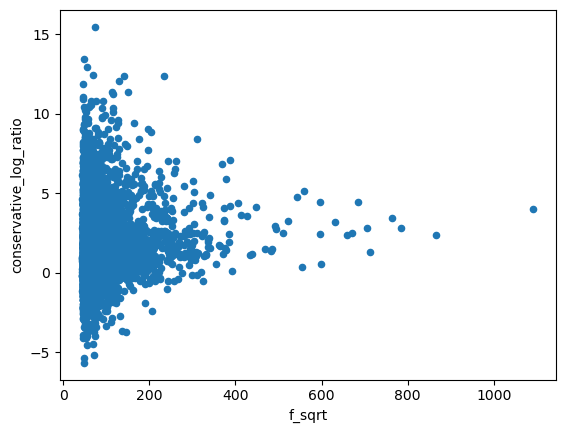

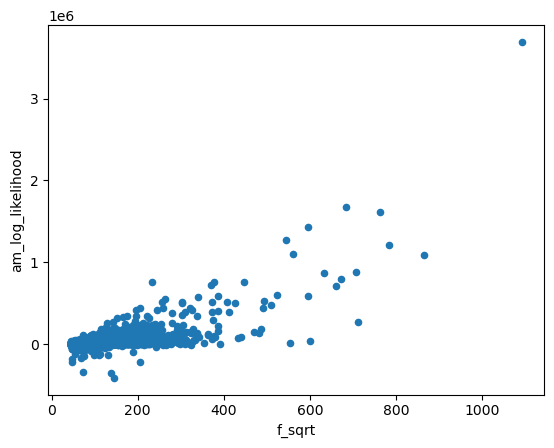

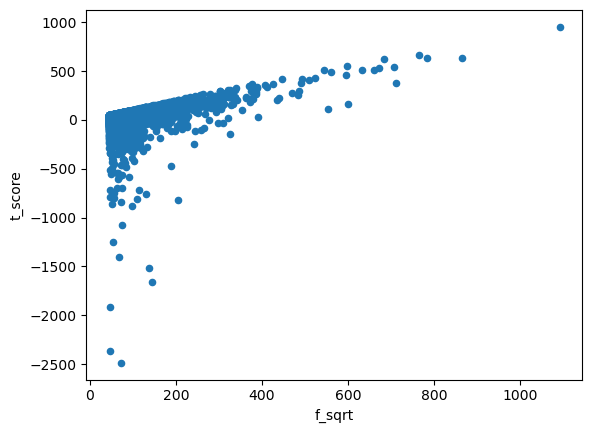

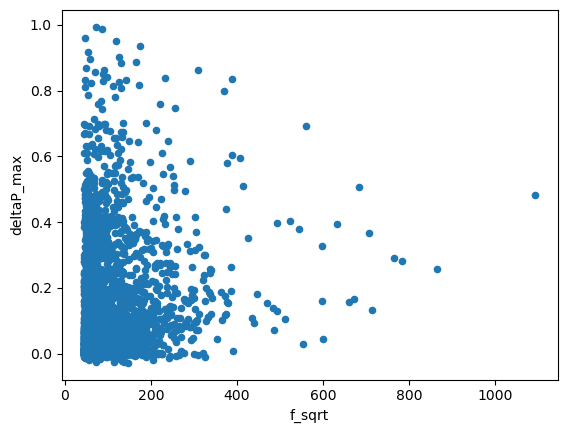

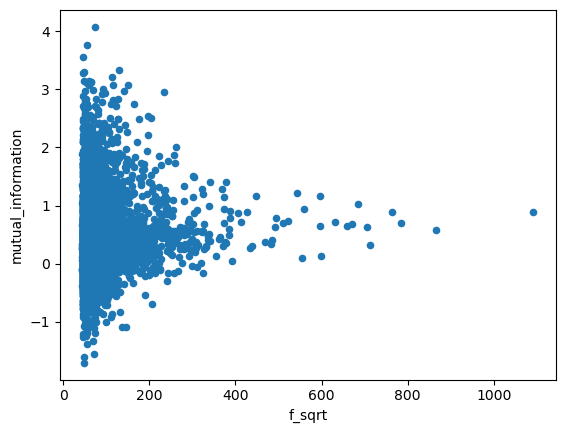

In [166]:
def scatter_by_f(assoc_df,
                 metrics=['conservative_log_ratio', 'am_log_likelihood', 't_score', 'mutual_information', 'deltaP_max'], 
                 f_col = 'f_sqrt', 
                 use_abs=False):
    for col in metrics: 
        col = f'{col}_abs' if use_abs else col
        assoc_df.plot(x=f_col, y=col, kind='scatter')

scatter_by_fsqrt(amdf_num)

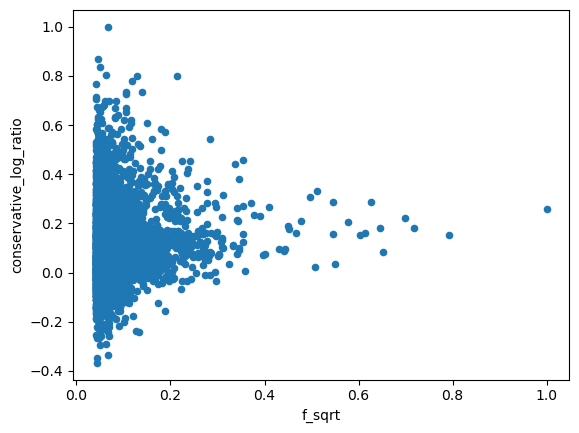

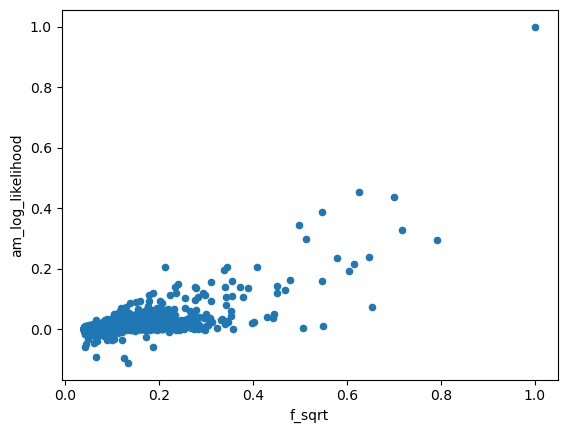

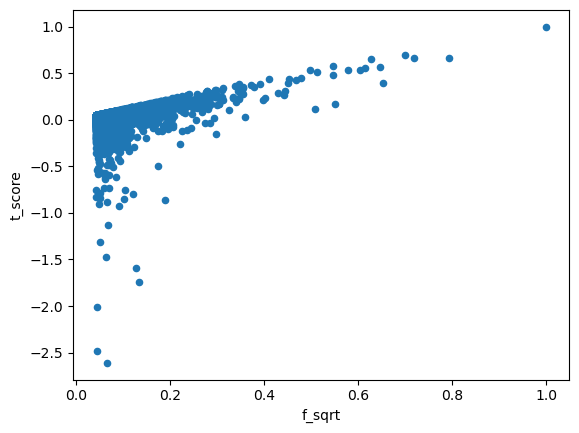

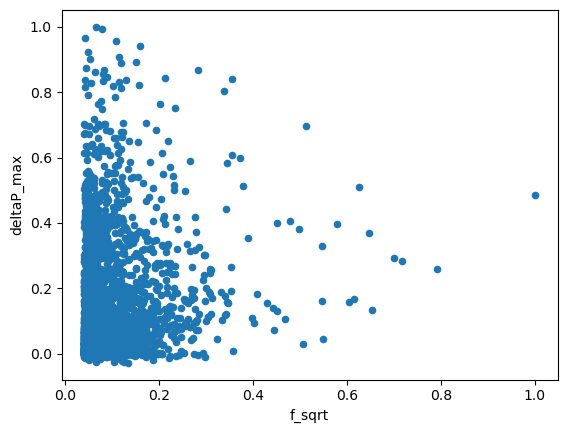

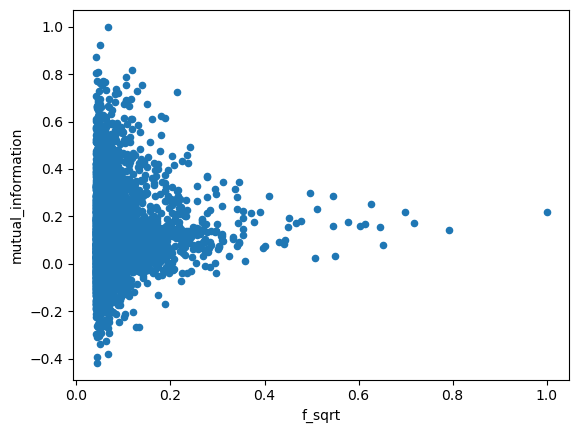

In [167]:
scatter_by_fsqrt(rel_amdf)

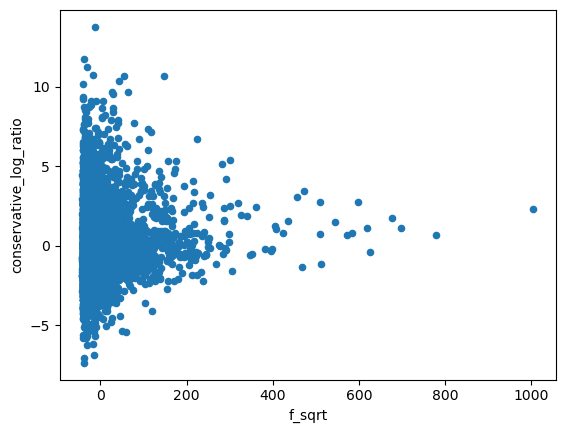

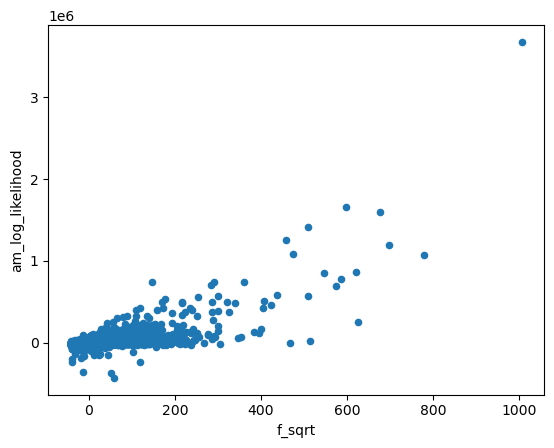

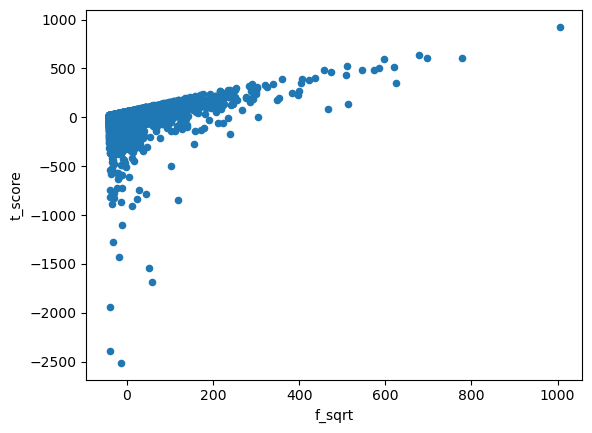

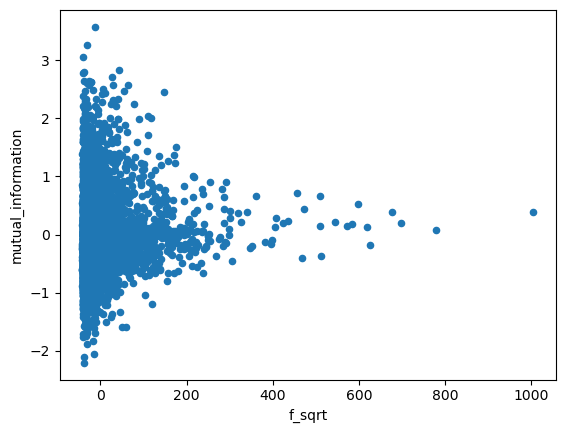

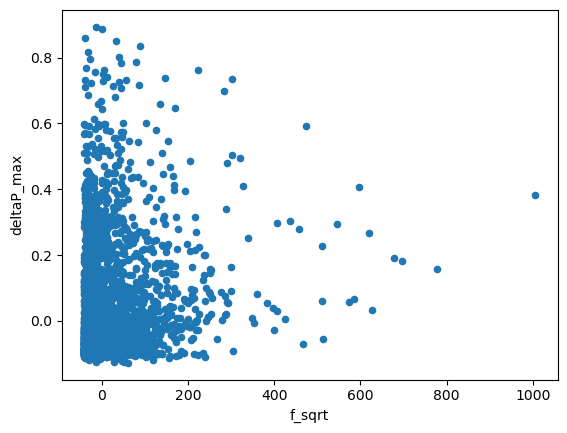

In [168]:
scatter_by_f(ms_amdf)

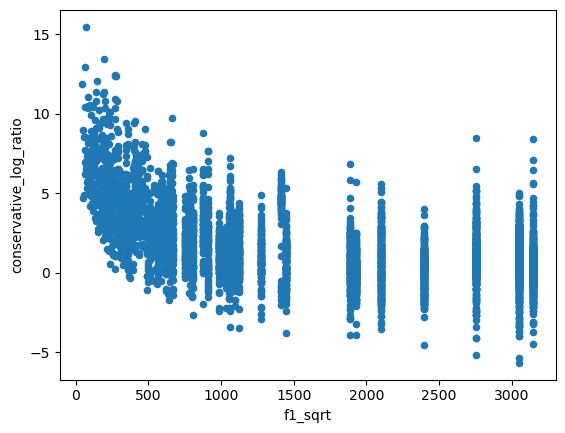

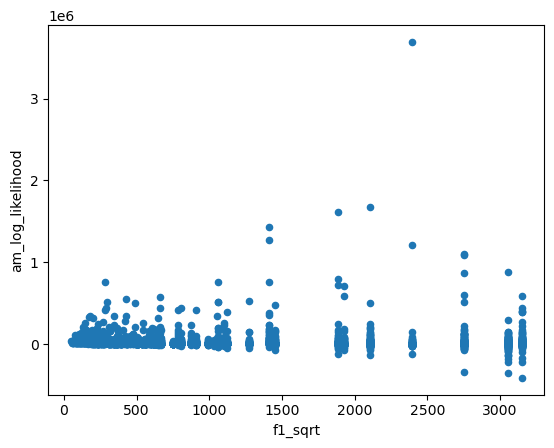

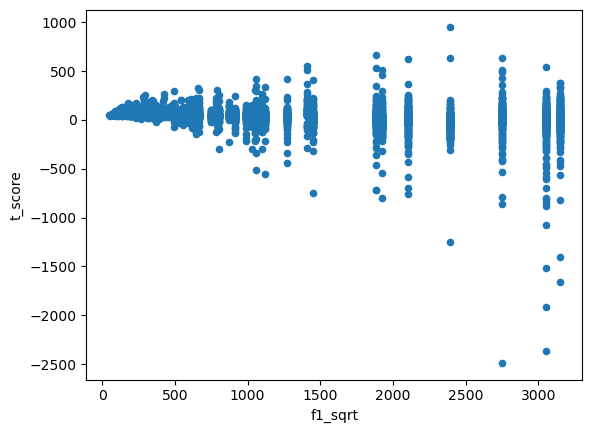

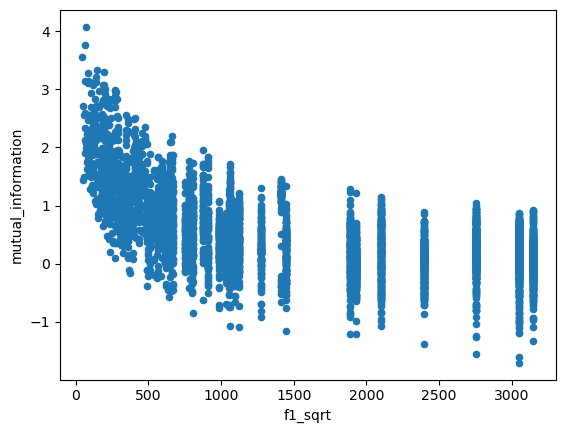

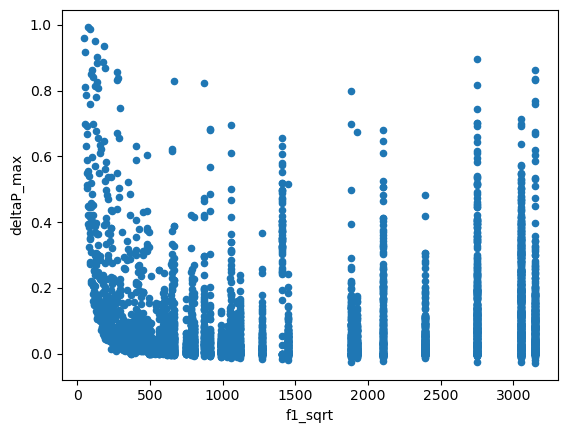

In [169]:
scatter_by_f(amdf_num, f_col='f1_sqrt')

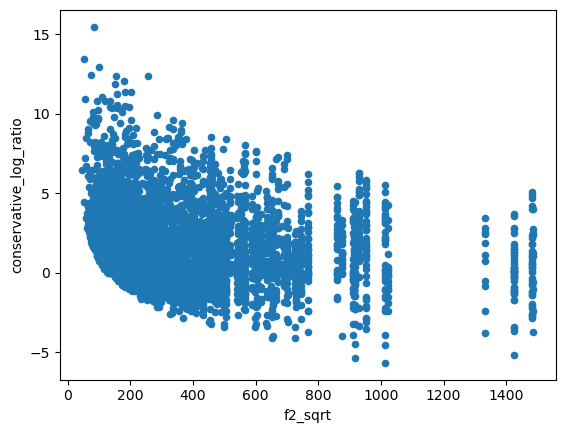

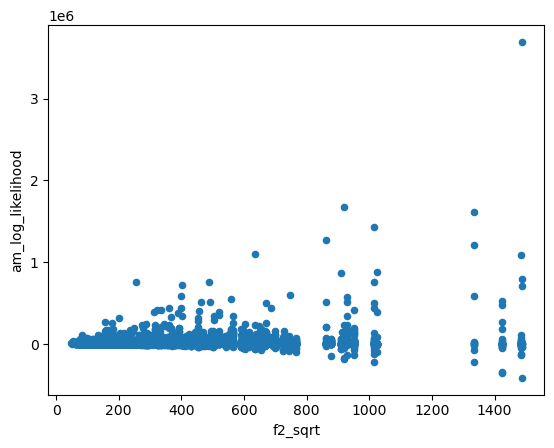

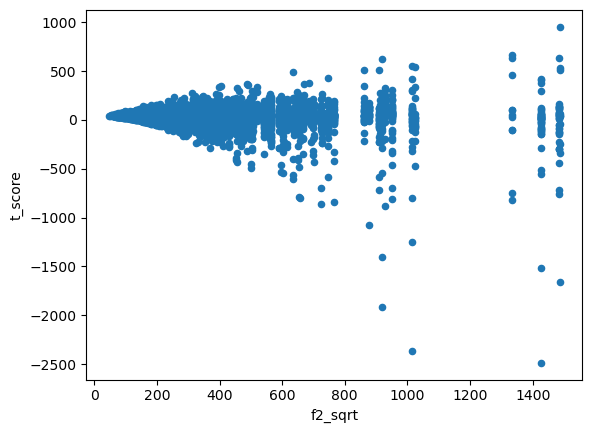

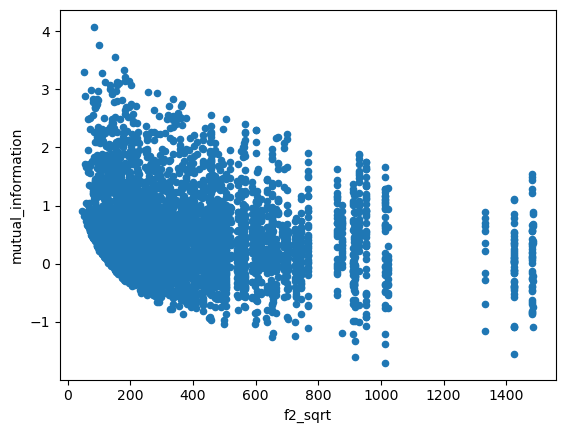

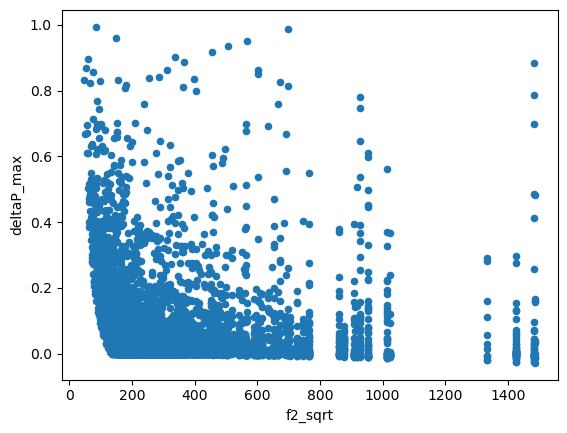

In [170]:
scatter_by_f(amdf_num, f_col='f2_sqrt')